<style>
    color{
        color : lightCoral
    }
	p{
		line-height: 1.5
	}
</style>
# Q&A (Week 2)

### <color>1. 了解dataloader是如何与data_collator协作发挥作用的</color>
#### data_collator(即：collate_fn)：
* 定义： **Data collators are objects that will form a batch by using a list of dataset elements as input.**
  
* 作用： 将 batch 的样本堆叠，形成 torch.tensor
  
* 用法： `loader = Dataloader(dataset, batch_size, shuffle, collate_fn, ...)`
  
* 伪代码：
```
    def collate_fn(data):
	for unit in data:
		unit_x.append(unit[0])
		unit_y.append(unit[1])
		...
	return {x: torch.tensor(unit_x),  y: torch.tensor(unit_y)}
```
#### DataLoader 的工作原理：    

<img src = "pic&videos\dataLoader -original-original.gif" width = 60%>  
<p>
解释：在dataloader按照batch进行取数据的时候, 是取出大小等同于batch size的index列表; 然后将列表列表中的index输入到dataset的getitem()函数中,取出该index对应的数据; 最后, 对每个index对应的数据进行堆叠, 就形成了一个batch的数据.
</p>

#### collator与dataloader协作：
向DataLoader传入 data_loader.py 中的 MTDataSet 类后，DataLoader将该类对象的data部分传入 collate_fn，fn则将其转为 tensor


<style>
    color{
        color : lightCoral
    }
	p{
		line-height: 1.5
	}
</style>
### <color>2. 模型类（Module）如何识别哪些变量为模型参数？</color>
#### nn.Module:
pytorch里面一切自定义操作基本上都是继承nn.Module类来实现的, 需要继承nn.Module类，并重新实现构造函数__init__和forward这两个方法

#### 设置可以梯度回传的参数
* 一般把网络中具有可学习参数的层（如全连接层、卷积层等）放在构造函数__init__()中，当然我也可以吧不具有参数的层也放在里面；
* 一般把不具有可学习参数的层(如ReLU、dropout、BatchNormanation层)可放在构造函数中，也可不放在构造函数中，如果不放在构造函数__init__里面，则在forward方法里面可以使用nn.functional来代替


<style>
    color{
        color : lightCoral
    }
	p{
		line-height: 1.5
	}
</style>

### <color>3. Pytorch自动求导机制，重点关注Tensor的requires_grad属性以及backward函数</color>
#### 为何需要自动求导机制？
由于：构建与训练深度学习的基本流程是: 根据网络结构逐步搭建计算图，然后求得损失函数，之后根据计算图来计算导数，最后利用梯度下降方法更新参数.
#### requires_grad: 
<p>
requires_grad=True 代表需要自动求导数，具体来说：这个参数告诉PyTorch跟踪由对params张量进行操作后产生的张量的整个系谱树。换句话说，任何将params作为祖先的张量都可以访问从params到那个张量调用的函数链。如果这些函数是可微的（大多数PyTorch张量操作都是可微的），导数的值将自动填充为params张量的grad属性。
</p>

#### backward：
backward 函数使torch依据**计算图**，反向遍历，从而计算并储存梯度值

#### 简单案例：
    a = torch.tensor(2.0,requires_grad = True)
    b = torch.tensor(3.0)
    c = a*b 
    c.backward()

##### 图示：
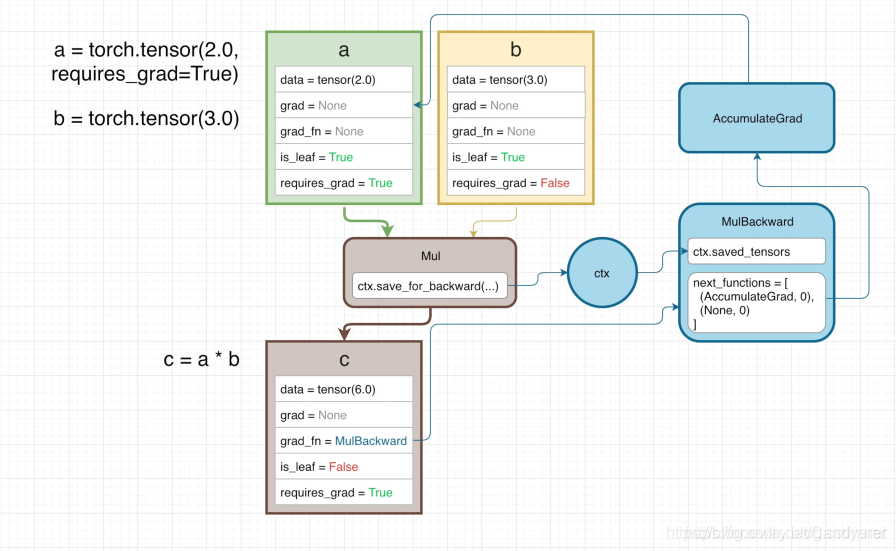 

##### 解释：
* grad_fn: 计算梯度的后向函数，即记录该量是如何计算而来，从而计算梯度
  
* 如图所示，当调用backward时，torch依据计算图反向遍历，当遇到requires_grad=True（且is_leaf）时，对其求导（依据grad_fn等信息）

* 当我们调用tensor的乘法函数时,同时调用了隐性变量 ctx (context)变量的save_for_backward()，此函数保存了forward运算时的一些参数，ctx起到了缓存相关参数的作用，在做 backfard 运算时， ctx中的值将会被对应的函数读取。

##### 参考：
* tensor：https://zhuanlan.zhihu.com/p/142859846
* is_leaf以及自动求导：https://blog.csdn.net/Candyerer/article/details/113180891
* https://zhuanlan.zhihu.com/p/511392677


<style>
    color{
        color : lightCoral
    }
	p{
		line-height: 1.5
	}
</style>

### <color>4. 优化器如何对模型参数进行更新 </color>
#### 优化器作用：
在深度学习反向传播过程中，指引损失函数（目标函数）的各个参数往正确的方向更新合适的大小，使得更新后的各个参数让损失函数（目标函数）值不断逼近全局最小

#### 优化器原理：
**通过确定优化方向（即：梯度或动量），以及优化步长，来更新参数**   

    公式如下：
待优化参数：$\omega$,  目标函数：f(x),  初始学习率：$\alpha$,  迭代epoch：t  
  
    更新步骤：
1. 计算目标函数关于当前参数的梯度：
   $$g_t = \triangledown f(W_t)$$
2. 根据历史梯度计算一阶动量和二阶动量：
   $$m_t = \phi (g_1,g_2,...,g_t)\ \ \  V_t = \sum_0^t x_i^2$$
3. 计算当前时刻的下降梯度：
   $$\eta_t = \alpha \cdot m_t / \sqrt{V_t}$$
4. 根据下降梯度进行更新参数：
    $$\omega_{t+1} = \omega_{t} - \eta_t$$   
    
*步骤Ⅲ、Ⅳ对于各个算法都是一致的，不同方法主要的差别就体现在步骤Ⅰ、Ⅱ上*

##### 参考：
https://zhuanlan.zhihu.com/p/261695487

<style>
    color{
        color : lightCoral
    }
	p{
		line-height: 1.5
	}
</style>
### <color>5. 了解学习率衰减策略</color>
#### 学习率：
用于控制权重更新步长
#### 学习率衰减：
由于期望在训练初期学习率大一些，使得网络收敛迅速，在训练后期学习率小一些，使得网络更好的收敛到最优解，故学习率往往是衰减的

### 策略
<img src = "pic&videos\指数衰减.webp" width = 250px>
<img src ="pic&videos\固定步长衰减.webp" width = 250px >

#### 指数衰减：（如图1）
* 代码：
```
optimizer_ExpLR = torch.optim.SGD(net.parameters(), lr=0.1)

ExpLR = torch.optim.lr_scheduler.ExponentialLR(optimizer_ExpLR, gamma=0.98)
```

#### 固定步长衰减：（如图2）
* 代码：
```
optimizer_StepLR = torch.optim.SGD(net.parameters(), lr=0.1)

StepLR = torch.optim.lr_scheduler.StepLR(optimizer_StepLR, step_size=step_size, gamma=0.65)
```
   
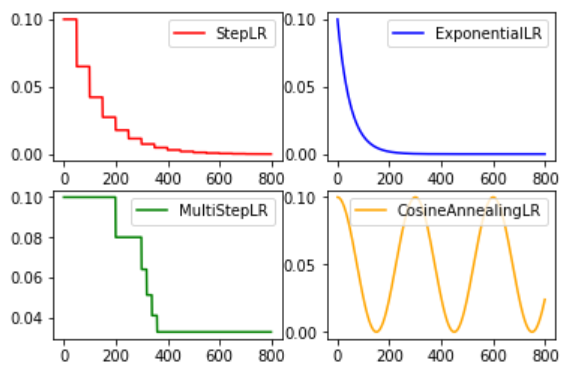

<style>
    color{
        color : lightCoral
    }
	p{
		line-height: 1.5
	}
</style>
### <color>6. 了解并能执行单机多卡，多机多卡训练过程</color>
#### 参考：
https://zhuanlan.zhihu.com/p/74792767

<style>
    color{
        color : lightCoral
    }
	p{
		line-height: 1.5
	}
</style>
### <color>7. 了解什么是CUDA, cudnn, nccl，以及这些与pytorch之间是什么关系</color>
#### CUDA
统一计算设备架构（Compute Unified Device Architecture, CUDA），是由NVIDIA推出的通用并行计算架构。解决的是用更加廉价的设备资源，实现更高效的并行计算。
#### CUDNN
NVIDIA cuDNN是用于深度神经网络的GPU加速库。它强调性能、易用性和低内存开销。NVIDIA cuDNN可以集成到更高级别的机器学习框架中，如谷歌的Tensorflow、加州大学伯克利分校的流行caffe软件。简单的插入式设计可以让开发人员专注于设计和实现神经网络模型，而不是简单调整性能，同时还可以在GPU上实现高性能现代并行计算。
#### nccl
NCCL是NVIDIA的集合通信库，能实现Collective通信和点对点通信，关注与GPU间的通信，而不是一个并行编程框架  
通过通信的方式支持多gpu并行